In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import re

def remove_emojis_and_links(text):
    # Remove emojis
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text_without_emojis = emoji_pattern.sub(r'', text)
    
    # Remove URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text_without_links = url_pattern.sub(r'', text_without_emojis)
    
    return text_without_links

# Load your dfset
df = pd.read_csv('putin_tucker.csv')

# Remove emojis and links from all text columns
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].apply(remove_emojis_and_links)

# Save the cleaned dfset
df.to_csv('cleaned_dfset.csv', index=False)


In [3]:
df.isnull().sum()

Comment              0
Anonymized Author    0
Published At         0
Likes                0
Reply Count          0
dtype: int64

In [4]:
df.describe()

,Likes,Reply Count
count,100000.000000,100000.000000
mean,52.227230,2.386920
std,310.010713,7.695083
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,11.000000,1.000000
max,79514.000000,750.000000


In [5]:
df.drop_duplicates()


,Comment,Anonymized Author,Published At,Likes,Reply Count
0,Watch my immediate reaction to the interview h...,533fb31af87a0ff551c4dc7a73634ccf7e9005f8eb4673...,2024-02-08T23:44:11Z,25601,750
1,The Russian to English translator did an EXCEL...,e00ef7ce570d1e6ba6e914755ffb9a0055386a3b0a6114...,2024-02-09T02:33:19Z,79514,750
2,The translation from Russian to English was ex...,c4add09939263f9b8509035f63b869662bc542641a3dc3...,2024-02-19T04:32:50Z,265,5
3,That was the longest 1 minute and 30 seconds h...,5b4d9b16bbfbc80edcb1941313fc0ee53748aea58bf3b8...,2024-02-18T06:58:59Z,1076,27
4,What's the difference between Tucker and a mob...,05ed0eddfa93d78083bcfb64186f749c6667c87da5ebc5...,2024-02-19T09:52:34Z,70,0
...,...,...,...,...,...
99995,Could you imagine Biden trying to discuss the ...,02d6f4bf8ad07e591ffab304e38b248991b4e305d118b6...,2024-02-18T03:49:31Z,0,0
99996,Meanwhile...Our American President is too inco...,37f09b2b0f7f8d8541aaec019f261b505be75dac2df40d...,2024-02-18T23:47:08Z,1,0
99997,thank god fox fire you they did you a big favo...,2ffa54fee25c206960c59620214df3d4b0a5cfd0992824...,2024-02-20T07:40:31Z,0,0
99998,Tucker got trolled. Made to sit there and be t...,09ce660581ebc4bdc4bbbfb4c0bdb0a99e8661b69023cf...,2024-02-19T05:48:24Z,3,0


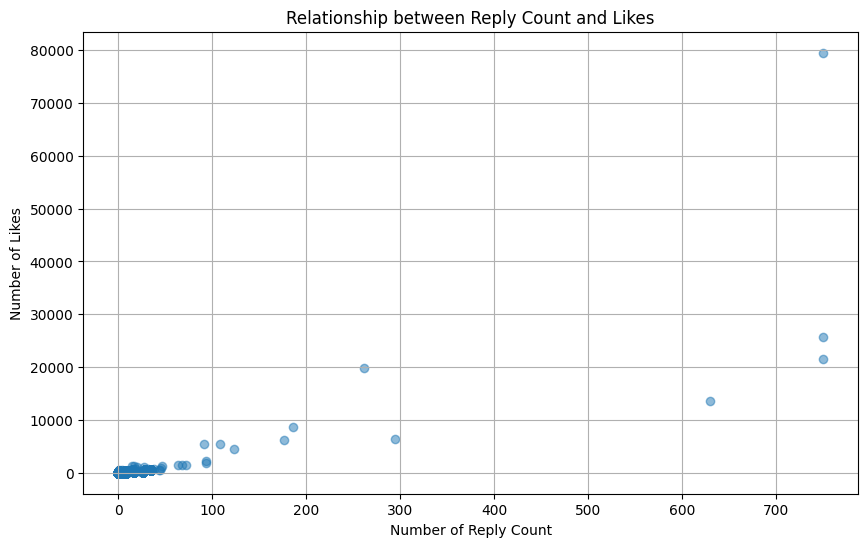

In [6]:
from matplotlib import pyplot as plt
comments = df['Reply Count']
likes = df['Likes']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comments, likes, alpha=0.5)
plt.title('Relationship between Reply Count and Likes')
plt.xlabel('Number of Reply Count')
plt.ylabel('Number of Likes')
plt.grid(True)
plt.show()

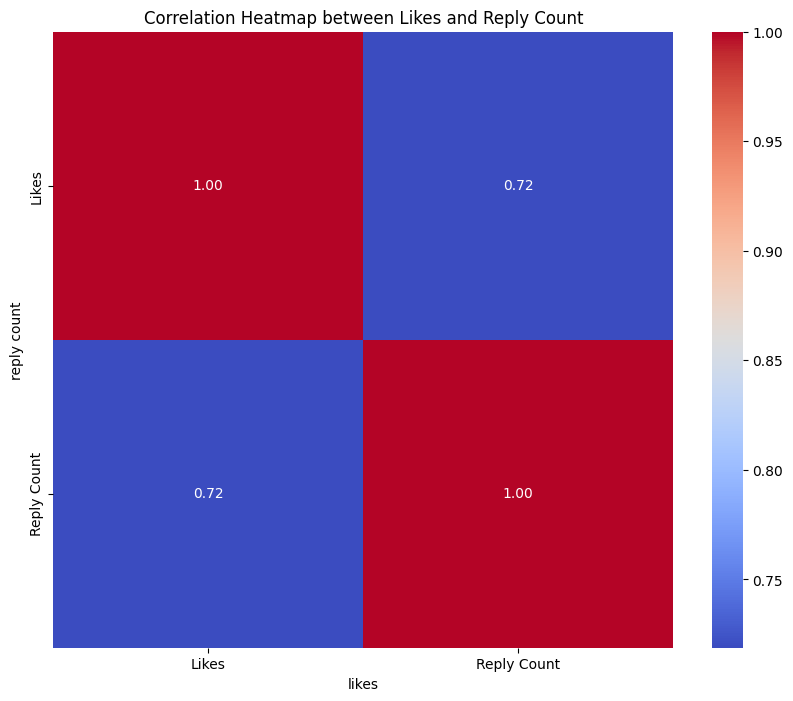

In [7]:
import seaborn as sns


# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Likes', 'Reply Count']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Likes and Reply Count')
plt.xlabel('likes')
plt.ylabel('reply count')
plt.show()


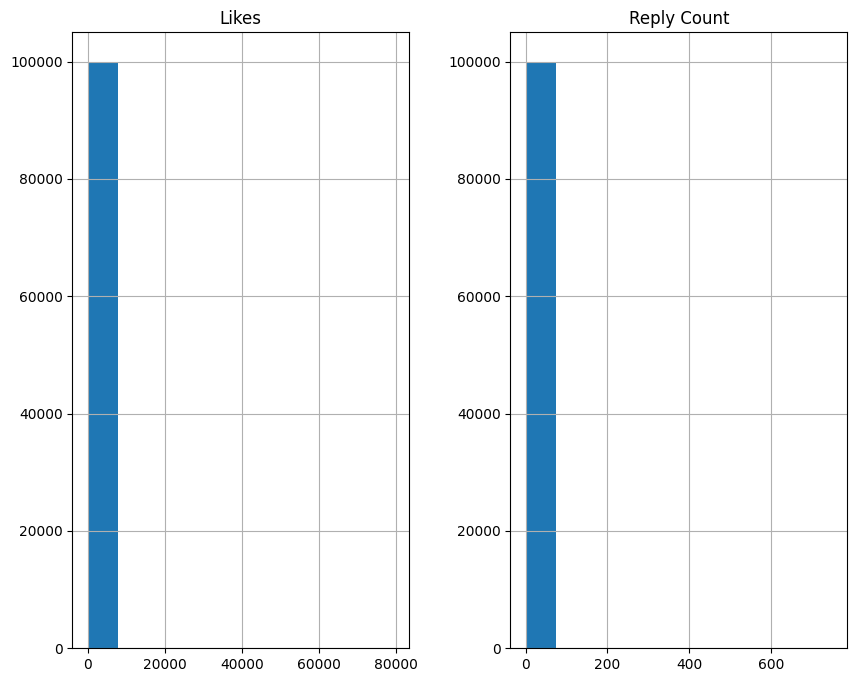

In [8]:
# Histogram for numeric columns
df.hist(figsize=(10, 8))
plt.show()


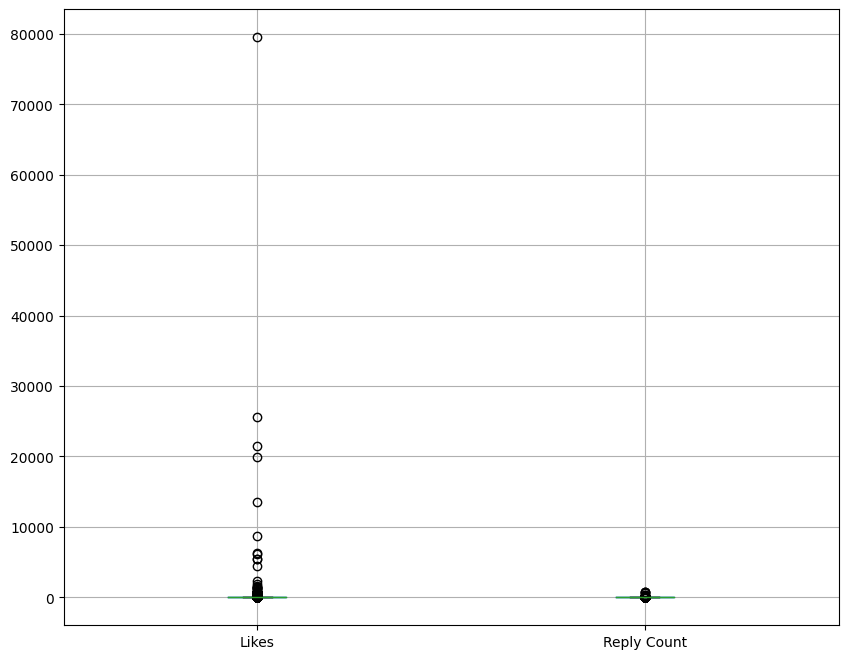

In [9]:
# Boxplot for numeric columns
plt.figure(figsize=(10, 8))
df.boxplot()
plt.show()


In [10]:
x= df['Likes'].values.reshape(-1, 1)
y= df['Reply Count']

In [11]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=0)  

LINEAR REGRESSION

In [12]:
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import r2_score
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  
train_r2_score = r2_score(y_train, y_train)
test_r2_score = r2_score(y_test, y_test)

print("Training R^2 score:", train_r2_score)
print("Testing R^2 score:", test_r2_score)

Training R^2 score: 1.0
Testing R^2 score: 1.0


GOT 100% accuracy


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report



x_train = [str(text) for text in x_train]
x_test = [str(text) for text in x_test]

# Convert text data into numerical features using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
X_test_tfidf = tfidf_vectorizer.transform(x_test)

# Train an SVM model
svm_model = SVC(kernel='linear')  # Linear kernel is commonly used for text classification
svm_model.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90     12113
           1       0.87      0.42      0.57      3435
           2       1.00      0.32      0.48      1233
           3       1.00      0.50      0.67       440
           4       1.00      0.49      0.65       393
           5       1.00      0.99      1.00       205
           6       0.00      0.00      0.00         1
           7       1.00      0.49      0.66       368
           8       1.00      1.00      1.00       203
           9       0.00      0.00      0.00         0
          11       1.00      1.00      1.00       199
          14       1.00      1.00      1.00       203
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00       206
          17       0.65      1.00      0.79       396
          24       0.00      0.00      0.00         0
          26       0.50      1.00      0.67       183
          27       0.00    

In [14]:
# Define a threshold for likes and reply counts to classify comments as cyberbullying
likes_threshold = 1000
reply_threshold = 50

# Create a new column 'Cyberbullying' based on the conditions
df['Cyberbullying'] = ((df['Likes'] >= likes_threshold) | (df['Reply Count'] >= reply_threshold)).astype(int)

# Display the updated DataFrame
print(df.head())


                                             Comment   
0  Watch my immediate reaction to the interview h...  \
1  The Russian to English translator did an EXCEL...   
2  The translation from Russian to English was ex...   
3  That was the longest 1 minute and 30 seconds h...   
4  What's the difference between Tucker and a mob...   

                                   Anonymized Author          Published At   
0  533fb31af87a0ff551c4dc7a73634ccf7e9005f8eb4673...  2024-02-08T23:44:11Z  \
1  e00ef7ce570d1e6ba6e914755ffb9a0055386a3b0a6114...  2024-02-09T02:33:19Z   
2  c4add09939263f9b8509035f63b869662bc542641a3dc3...  2024-02-19T04:32:50Z   
3  5b4d9b16bbfbc80edcb1941313fc0ee53748aea58bf3b8...  2024-02-18T06:58:59Z   
4  05ed0eddfa93d78083bcfb64186f749c6667c87da5ebc5...  2024-02-19T09:52:34Z   

   Likes  Reply Count  Cyberbullying  
0  25601          750              1  
1  79514          750              1  
2    265            5              0  
3   1076           27              1  

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.sparse import hstack

# Assuming "Cyberbullying" is a binary label in your dataset
y = df["Cyberbullying"]

# Text data
X_text = df["Comment"]
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_text_tfidf = tfidf_vectorizer.fit_transform(X_text)

# Numeric features
X_numeric = df[['Likes', 'Reply Count']]
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

# Author (assuming it's categorical)
X_author = df["Anonymized Author"]
author_vectorizer = TfidfVectorizer()
X_author_encoded = author_vectorizer.fit_transform(X_author)

# Combine features
X_combined = hstack((X_text_tfidf, X_numeric_scaled, X_author_encoded))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Evaluate the classifier
y_pred = svm_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

# Example of predicting new comments
new_comments = ["This is a friendly message.", "You are ugly and should die."]
new_likes = [10, 5000]
new_reply_count = [2, 100]
new_author = ["user123", "user456"]

new_comments_tfidf = tfidf_vectorizer.transform(new_comments)
new_numeric_scaled = scaler.transform([[like, reply_count] for like, reply_count in zip(new_likes, new_reply_count)])
new_author_encoded = author_vectorizer.transform(new_author)
new_combined = hstack((new_comments_tfidf, new_numeric_scaled, new_author_encoded))
predictions = svm_classifier.predict(new_combined)
print("Predictions for new comments:", predictions)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19998
           1       1.00      1.00      1.00         2

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

Predictions for new comments: [0 1]


In [16]:
from sklearn.metrics import accuracy_score

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predictions on training and testing sets
y_train_pred = svm_classifier.predict(X_train)
y_test_pred = svm_classifier.predict(X_test)

# Evaluate accuracy on training and testing sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Check for underfitting or overfitting
if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("Model might be underfitting.")
else:
    print("Model is performing consistently on both training and testing sets.")


Training Accuracy: 1.00
Testing Accuracy: 1.00
Model is performing consistently on both training and testing sets.
